In [1]:
# Save this file in the name of the ML model you are using
import pandas as pd
import numpy as np
import os

In [2]:
# Website for the dataset:
# https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data?select=icml_face_data.csv

CLASS_NAMES = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
CLASS_NAMES_WITHOUT_DISGUST = ["Angry", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
FILE_NAME = "train.csv" # Insert file name
WHITE_IMAGES = [6458,  7629, 10423, 11286, 13148, 13402, 13988, 15894, 22198, 22927, 28601, 59]

In [3]:
data_path = ["E:/Anaconda/data"] # Insert data file path
file_path = os.sep.join(data_path + [FILE_NAME])
data = pd.read_csv(file_path)
data = data.drop(index=WHITE_IMAGES, axis=0)

# If icml_face_data.csv is used
# data.drop(' Usage', axis=1, inplace=True)

data.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [4]:
data.shape

(28697, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28697 entries, 0 to 28708
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  28697 non-null  int64 
 1   pixels   28697 non-null  object
dtypes: int64(1), object(1)
memory usage: 672.6+ KB


In [6]:
data.describe()

,emotion
count,28697.000000
mean,3.318117
std,1.876194
min,0.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,6.000000


In [7]:
from collections import Counter

print('number of samples: ', len(data))
print('number of unique samples: ', len(data[data.columns[1]].unique()))
print('keys: ', list(data.keys()))
print('\n')

for i in range(len(CLASS_NAMES)):
    print(CLASS_NAMES[i] + ' ', ((data['emotion'].value_counts())[i]))


number of samples:  28697
number of unique samples:  27471
keys:  ['emotion', 'pixels']


Angry  3988
Disgust  436
Fear  4096
Happy  7214
Sad  4829
Surprise  3170
Neutral  4964


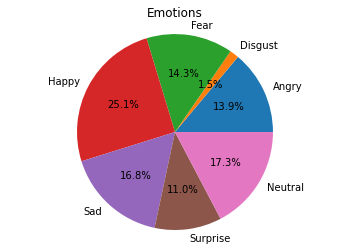

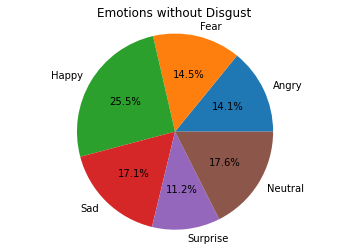

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

# (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral)
data_Angry = data[data['emotion'] == 0]
data_Disgust = data[data['emotion'] == 1]
data_Fear = data[data['emotion'] == 2]
data_Happy = data[data['emotion'] == 3]
data_Sad = data[data['emotion'] == 4]
data_Surprise = data[data['emotion'] == 5]
data_Neutral = data[data['emotion'] == 6]

sizes = [data_Angry.shape[0], data_Disgust.shape[0], data_Fear.shape[0], data_Happy.shape[0], data_Sad.shape[0], data_Surprise.shape[0], data_Neutral.shape[0]]

fig, ax = plt.subplots()
ax.pie(sizes, labels=CLASS_NAMES, autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Emotions')


plt.show()

sizes = [data_Angry.shape[0], data_Fear.shape[0], data_Happy.shape[0], data_Sad.shape[0], data_Surprise.shape[0], data_Neutral.shape[0]]
labels = ['Angry', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral' ]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Emotions without Disgust')


plt.show()

In [9]:
data_exclude_disgust = data[data['emotion'] != 1] # Drops the emotion Disgust
data_exclude_disgust = data_exclude_disgust.replace({
    2 : 1,
    3 : 2,
    4 : 3,
    5 : 4,
    6 : 5
})
data_exclude_disgust.shape, data_exclude_disgust.emotion.unique()

((28261, 2), array([0, 1, 3, 5, 2, 4], dtype=int64))

In [10]:
def data_X_y(data):
    # Split data into X & y
    X = data.drop('emotion', axis='columns')
    y = data['emotion']

    # Reshapes X into 3D array
    X = [pixels.split(" ") for pixels in data["pixels"]]
    X = np.array(X)
    X = X.astype("int32")
    X = np.array([image.reshape(48, 48) for image in X])
    X = X/255.0
    X = X.reshape(len(X), 48, 48, 1)
    
    return X,y

In [11]:
X,y = data_X_y(data_exclude_disgust)

print(X.max())
print(X.shape)
print(X.min(), X.max())
print(y.shape)
print(y.unique())

1.0
(28261, 48, 48, 1)
0.0 1.0
(28261,)
[0 1 3 5 2 4]


In [12]:
from skimage.io import imread
from skimage.transform import resize

def show_samples(X, data):
    # Array with all the unique emotions
    labels = np.unique(data_exclude_disgust['emotion'])

    fig, axes = plt.subplots(6, len(labels))
    fig.set_size_inches(15,10)
    fig.tight_layout()

    for ax, label in zip(axes, labels):
        i = 0 # starting point
        for a in ax:
            # A list with a the index for the corresponding emotion
            data_label_index_list = data_exclude_disgust.index[data_exclude_disgust['emotion'] == label].tolist()

            a.imshow(X[data_label_index_list[i]])
            a.axis('off')
            a.set_title(CLASS_NAMES_WITHOUT_DISGUST[label])
            i=i+1

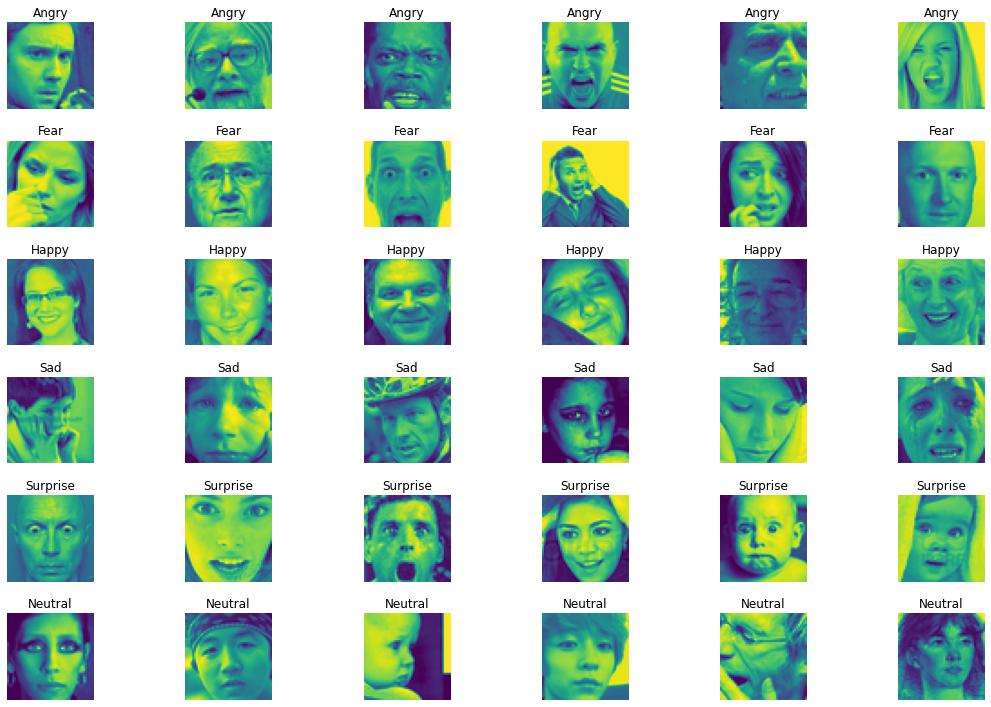

In [13]:
show_samples(X, data_exclude_disgust)

In [14]:
X.shape

(28261, 48, 48, 1)

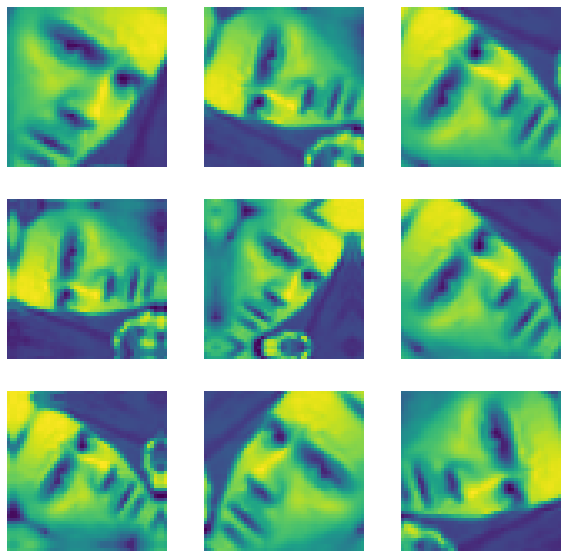

In [15]:
import tensorflow as tf
from tensorflow.keras import layers

# For more you can visit:
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.25),
    layers.experimental.preprocessing.RandomZoom(0.25),
])

image = tf.expand_dims(X[0], 0) # X[0] can be changed to view different images

plt.figure(figsize=(10, 10))
for i in range(9):
    augmented_image = data_augmentation(image)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image[0])
    plt.axis("off")

In [16]:
def join_list(list_pixels):
    # Creates a string from the list of pixels
    final_str = ' '.join(str(int(v)) for v in list_pixels)
    return final_str

def create_csv_data_augmentation(X, y, copies):
    # Creates new dataframe
    column_names = ["emotion", "pixels", "Original"]
    data_augmentated = pd.DataFrame(columns = column_names)
    
    for image,emotion in zip(X,y):
        # Adds the original image to the dataframe converted to a string
        image_array = list((np.array(image)).flat)
        image_string = join_list(image_array)
        new_row = {'emotion':emotion, 'pixels':image_string, 'Original':True}
        data_augmentated = data_augmentated.append(new_row,ignore_index=True)
        image_expand = tf.expand_dims(image, 0)

        for i in range(copies):
            # Adds the augmented image to the dataframe converted to a string
            augmented_image = data_augmentation(image_expand)
            augmented_image = list((np.array(augmented_image[0])).flat)
            augmented_image_string = join_list(augmented_image)
            new_row = {'emotion':emotion, 'pixels':augmented_image_string, 'Original':False}
            data_augmentated = data_augmentated.append(new_row, ignore_index=True)
    
    # Saves the dataframe to a csv file and in the title the amount of corresponding data augmentations
    save_data_augmentated_filepath = ('data/face_augmentated_{}'.format(copies))
    data_augmentated.to_csv(save_data_augmentated_filepath + '.csv', index = False)
    
    return data_augmentated

In [17]:
# # You can adjust the last value to choose how many unique copies you want to make
# # The higher the copies the longer the run time
# data_aug = create_csv_data_augmentation((X*255.0), y, 1) 

In [18]:
FILE_NAME_AUG = "face_augmentated_1.csv" # Change filename for less or more augmented images if present
file_path_aug = os.sep.join(data_path + [FILE_NAME_AUG])
data_aug = pd.read_csv(file_path_aug)

In [19]:
data_aug.shape

(56522, 3)

In [20]:
data_aug.head()

,emotion,pixels,Original
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,True
1,0,91 92 124 143 154 158 162 165 165 164 163 161 ...,False
2,0,151 150 147 155 148 133 111 140 170 174 182 15...,True
3,0,134 137 137 104 100 130 120 132 123 89 99 125 ...,False
4,2,231 212 156 164 174 138 161 173 182 200 106 38...,True


In [21]:
data_aug.drop('Original', axis=1, inplace=True)
X_aug, y_aug = data_X_y(data_aug)
y_aug = y_aug.astype('int32')

print(X_aug.shape)
print(y_aug.shape)

(56522, 48, 48, 1)
(56522,)


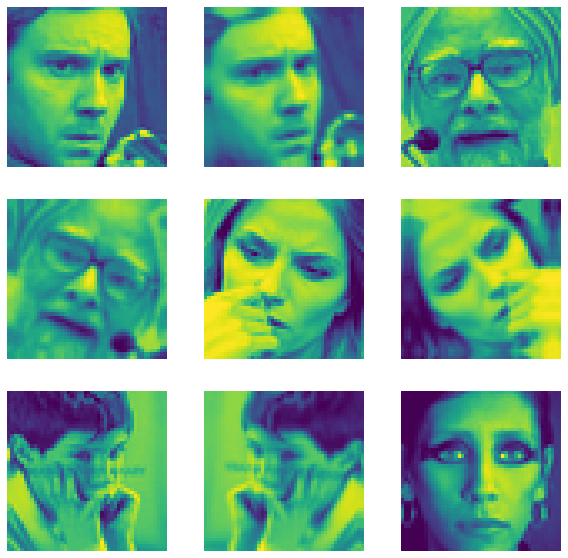

In [22]:
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(X_aug[i])
    plt.axis("off")

In [23]:
from scipy import ndimage

# Sigma can be changed for more or less blur
def blur_X(X, sigma = 0.8):
    for i in range(0, X.shape[0]):
        X[i] = ndimage.gaussian_filter(X[i], sigma=sigma)
    return X

In [24]:
X_blur = blur_X(X)

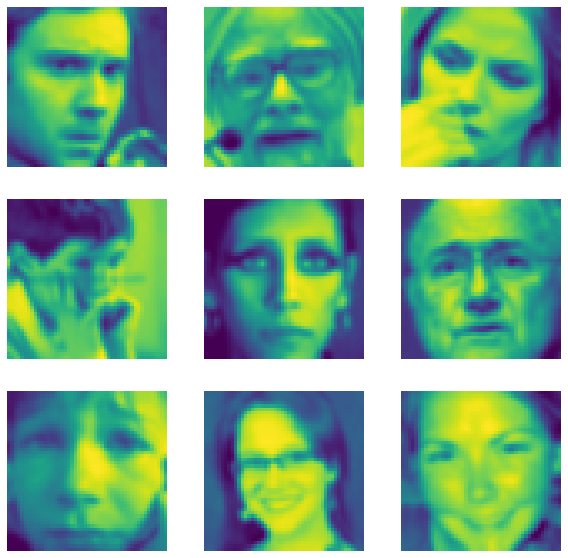

In [25]:
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(X_blur[i])
    plt.axis("off")

In [26]:
from builtins import range
from builtins import object

def reshape_X(X):
    num_training = X.shape[0]
    mask = list(range(num_training))
    X_reshape = X[mask]

    # Reshape the image data into rows
    X_reshape = np.reshape(X, (X.shape[0], -1))
    
    return X_reshape

In [27]:
print(X.shape)
X = reshape_X(X)
print(X.shape)

(28261, 48, 48, 1)
(28261, 2304)


In [28]:
X_blur = reshape_X(X_blur)

In [29]:
print(X_aug.shape)
X_aug = reshape_X(X_aug)
print(X_aug.shape)

(56522, 48, 48, 1)
(56522, 2304)


In [30]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

rus = RandomUnderSampler()
ros = RandomOverSampler()
smote = SMOTE()

In [31]:
X_rus, y_rus = rus.fit_resample(X,y) # This data is undersampled
X_ros, y_ros = ros.fit_resample(X,y) # This data is oversampled
X_smote, y_smote = smote.fit_resample(X,y) # This data is oversampled with smote

print(y_rus.value_counts())
print(y_ros.value_counts())
print(y_smote.value_counts())

0    3170
1    3170
2    3170
3    3170
4    3170
5    3170
Name: emotion, dtype: int64
0    7214
1    7214
2    7214
3    7214
4    7214
5    7214
Name: emotion, dtype: int64
0    7214
1    7214
2    7214
3    7214
4    7214
5    7214
Name: emotion, dtype: int64


In [32]:
print("SMOTE has of the {}, {} unique samples".format(len(X_smote),len(np.unique(X_smote, axis=0))))
print("ROS has of the {}, {} unique samples".format(len(X_ros),len(np.unique(X_ros, axis=0))))
print("RUS has of the {}, {} unique samples".format(len(X_rus),len(np.unique(X_rus, axis=0))))

SMOTE has of the 43284, 41662 unique samples
ROS has of the 43284, 27092 unique samples
RUS has of the 19020, 18195 unique samples


In [33]:
X_blur_rus, y_blur_rus = rus.fit_resample(X_blur,y) # This data is undersampled
X_blur_ros, y_blur_ros = ros.fit_resample(X_blur,y) # This data is oversampled
X_blur_smote, y_blur_smote = smote.fit_resample(X_blur,y) # This data is oversampled with smote

In [34]:
X_aug_smote, y_aug_smote = smote.fit_resample(X_aug,y_aug) # This data is oversampled with smote
X_aug_ros, y_aug_ros = ros.fit_resample(X_aug,y_aug) # This data is oversampled
X_aug_rus, y_aug_rus = rus.fit_resample(X_aug,y_aug) # This data is undersampled

In [35]:
def plot_train_test_distribution(y,loc='left', relative=True):
    width = 0.35
    CLASS_NAMES_WITHOUT_DISGUST = ["Angry", "Fear", "Happy", "Sad", "Surprise", "Neutral"]

    if loc == 'left':
        n = -0.5
    elif loc == 'right':
        n = 0.5
     
    # calculate counts per type and sort, to ensure their order
    unique, counts = np.unique(y, return_counts=True)
    sorted_index = np.argsort(unique)

    if relative:
        # plot as a percentage
        counts = 100*counts[sorted_index]/len(y)
        ylabel_text = '% count'
    else:
        # plot counts
        counts = counts[sorted_index]
        ylabel_text = 'count'
         
    xtemp = np.arange(len(unique))
    
    plt.bar(xtemp + n*width, counts, align='center', alpha=.7, width=width)
    plt.xticks(xtemp, CLASS_NAMES_WITHOUT_DISGUST, rotation=45)
    plt.xlabel('equipment type')
    plt.ylabel(ylabel_text)
    plt.suptitle('relative amount of images per type')

In [30]:
file_path = os.sep.join(data_path + ['icml_face_data.csv'])
data_test = pd.read_csv(file_path)
test = ["PrivateTest", "PublicTest"]
data_test = data_test.rename(columns= { " pixels":"pixels"})
data_test = data_test[data_test[' Usage'].isin(test) ]

# If icml_face_data.csv is used
data_test.drop(' Usage', axis=1, inplace=True)

data_test.head()

,emotion,pixels
28709,0,254 254 254 254 254 249 255 160 2 58 53 70 77 ...
28710,1,156 184 198 202 204 207 210 212 213 214 215 21...
28711,4,69 118 61 60 96 121 103 87 103 88 70 90 115 12...
28712,6,205 203 236 157 83 158 120 116 94 86 155 180 2...
28713,3,87 79 74 66 74 96 77 80 80 84 83 89 102 91 84 ...


In [31]:
data_test.shape

(7178, 2)

In [32]:
data_test = data_test[data_test['emotion'] != 1] # Drops the emotion Disgust
data_test = data_test.replace({
    2 : 1,
    3 : 2,
    4 : 3,
    5 : 4,
    6 : 5
})
data_test.shape, data_test.emotion.unique()

((7067, 2), array([0, 3, 5, 2, 1, 4], dtype=int64))

In [33]:
X_test, y_test = data_X_y(data_test)

In [34]:
print(X_test.shape)
X_test = reshape_X(X_test)
print(X_test.shape)

(7067, 48, 48, 1)
(7067, 2304)


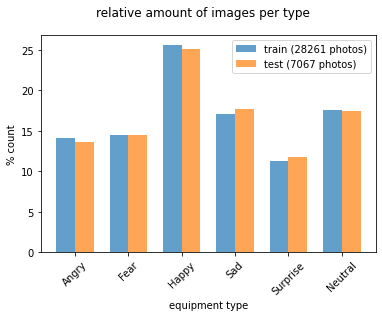

In [35]:
plot_train_test_distribution(y, loc='left')
plot_train_test_distribution(y_test, loc='right')
plt.legend([
    'train ({0} photos)'.format(len(y)), 
    'test ({0} photos)'.format(len(y_test))
]);

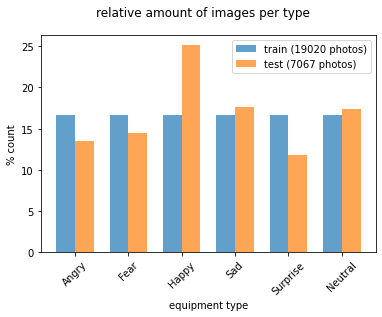

In [36]:
plot_train_test_distribution(y_rus, loc='left')
plot_train_test_distribution(y_test, loc='right')
plt.legend([
    'train ({0} photos)'.format(len(y_rus)), 
    'test ({0} photos)'.format(len(y_test))
]);

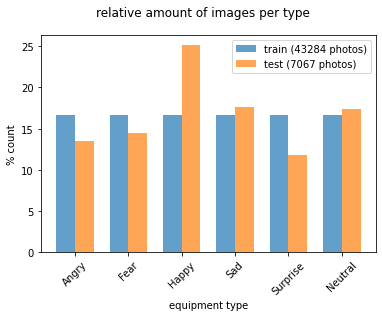

In [37]:
plot_train_test_distribution(y_ros, loc='left')
plot_train_test_distribution(y_test, loc='right')
plt.legend([
    'train ({0} photos)'.format(len(y_ros)), 
    'test ({0} photos)'.format(len(y_test))
]);

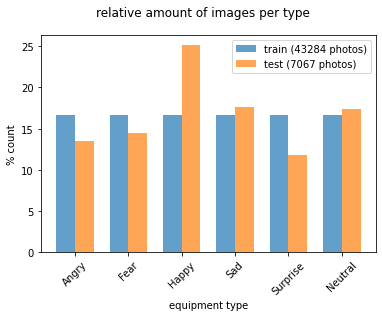

In [38]:
plot_train_test_distribution(y_smote, loc='left')
plot_train_test_distribution(y_test, loc='right')
plt.legend([
    'train ({0} photos)'.format(len(y_smote)), 
    'test ({0} photos)'.format(len(y_test))
]);

In [39]:
# # These are the X & y that can be used for fitting a ML model
# X,y # imblanced
# X_rus, y_rus # undersmapled
# X_ros, y_ros # oversampled
# X_smote, y_smote # SMOTE

In [36]:
# This is the blurred dataset
# X_blur, y
# X_blur_rus, y_blur_rus
# X_blur_ros, y_blur_ros
# X_blur_smote, y_blur_smote

In [40]:
# # This is the augmented dataset
# X_aug_smote, y_aug_smote
# X_aug_ros, y_aug_ros
# X_aug_rus, y_aug_rus

In [ ]:
# # For testing with unique images
# X_test, y_test

In [44]:
FILE_NAME_AUG = "face_augmentated_3.csv" # Change filename for less or more augmented images if present
file_path_aug = os.sep.join(data_path + [FILE_NAME_AUG])
data_aug_3 = pd.read_csv(file_path_aug)

data_aug_3.drop('Original', axis=1, inplace=True)
X_aug_3, y_aug_3 = data_X_y(data_aug_3)
y_aug_3 = y_aug_3.astype('int32')

X_aug_3 = reshape_X(X_aug_3)

X_aug_3_rus, y_aug_3_rus = rus.fit_resample(X_aug_3,y_aug_3) # This data is undersampled
X_aug_3_ros, y_aug_3_ros = ros.fit_resample(X_aug_3,y_aug_3) # This data is oversampled
X_aug_3_smote, y_aug_3_smote = smote.fit_resample(X_aug_3,y_aug_3) # This data is oversampled with smote

In [48]:
# X_aug_3_rus, y_aug_3_rus
# X_aug_3_ros, y_aug_3_ros
# X_aug_3_smote, y_aug_3_smote

In [49]:
from resizeimage import resizeimage
from PIL import Image, ImageOps

# This functions is used to import the test images and convert them to an np.array of 48x48
def import_test_sample(test_path):
    with open(test_path, 'r+b') as f:
        with Image.open(f) as image:
            test_image = resizeimage.resize_cover(image, [48,48])

    test_image = ImageOps.grayscale(test_image)

    test_image = np.array(test_image)
    test_image = test_image.astype("int32")
    test_image = test_image/255.0
    test_image = test_image.reshape(48, 48, 1)
    plt.imshow(test_image)
    print(test_image.shape)
    
    return test_image